In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import pearsonr
plt.style.use('ggplot')

# Cole's variables to analyze:
budget

homepage

original_language

overview

poster_path

production_countries

runtime

status

title

cast

revenue


## TODO:
handle outliers

add median or mean revenue to dicts for the ones that have them and can plot that

correlations

correlation plots

create features for log transforms


In [9]:
#Load in the data
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

## Initial Exploration of the Data

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [11]:
train.head(10)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
5,6,NaN,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,...,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638
6,7,NaN,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,...,8/30/12,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear The Demon That Doesn't Fear God,The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075
7,8,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,...,1/15/04,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511
8,9,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,...,2/16/96,100.0,"[{'

In [12]:
print ('The train data has {} rows and {} columns'.format(train.shape[0],train.shape[1]))
print ('----------------------------')
print ('The test data has {} rows and {} columns'.format(test.shape[0],test.shape[1]))

The train data has 3000 rows and 23 columns
----------------------------
The test data has 4398 rows and 22 columns


In [13]:
print("Training set missing values:\n", train.isna().sum())
print("\nTest set missing values:\n", test.isna().sum())

Training set missing values:
 id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

Test set missing values:
 id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0


## Budget Variable

In [14]:
print('Movies missing a budget:',train.budget.isna().sum())

Movies missing a budget: 0


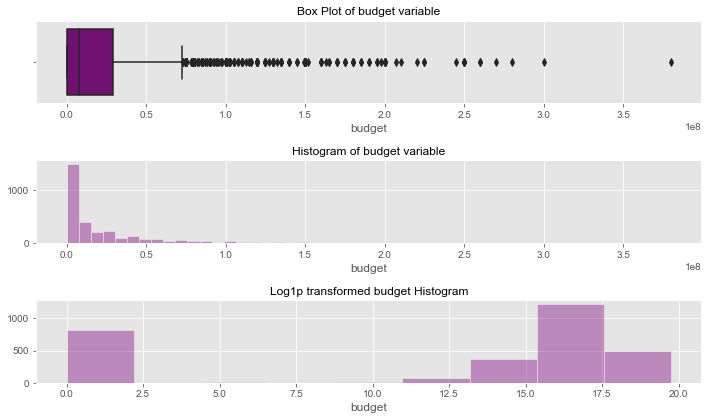

In [15]:
#plotting the data
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train.budget, ax = ax[0], color='purple')
ax[0].set_title("Box Plot of budget variable")
sns.distplot(a=train.budget, kde = False, ax = ax[1], color='purple')
ax[1].set_title("Histogram of budget variable")
sns.distplot(a=np.log1p(train.budget), kde = False, ax = ax[2], color='purple')
ax[2].set_title("Log1p transformed budget Histogram")
f.tight_layout()

train["log_budget"] = np.log1p(train.budget)
test["log_budget"] = np.log1p(test.budget)

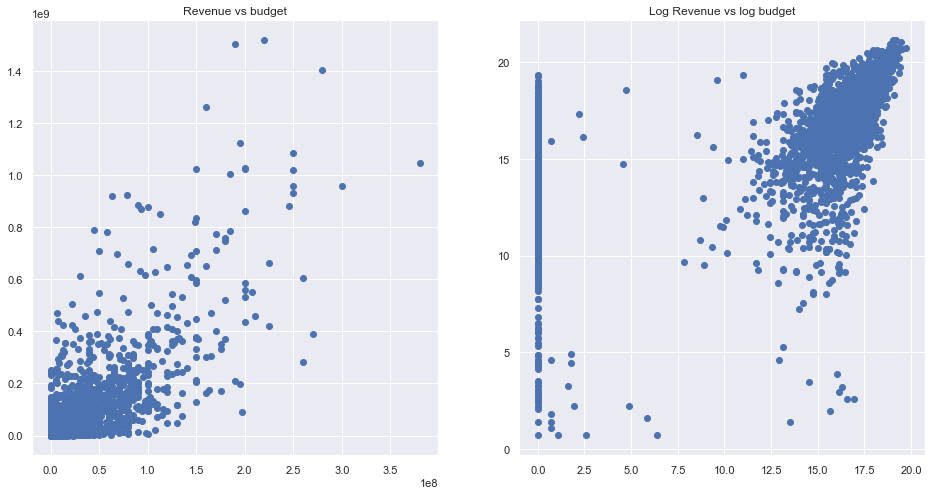

In [16]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(train['budget'], train['revenue'])
plt.title('Revenue vs budget');
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(train['budget']), np.log1p(train['revenue']))
plt.title('Log Revenue vs log budget');

In [17]:
#analysis of correlation and create log feature probably
corr, _ = pearsonr(train['budget'], train['revenue'])
print('Pearsons correlation between budget and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['budget']), (train['revenue']))
print('Pearsons correlation between log budget and revenue: %.3f' % corr)

Pearsons correlation between budget and revenue: 0.753
Pearsons correlation between log budget and revenue: 0.326


In [18]:
print('Movies with budget listed as 0: ',(train.budget == 0).sum())

Movies with budget listed as 0:  812


The distribution on budget in the training set is heavily skewed, so we perform a log1p transform to make the distribution more normal. Additionally, while there are no movies missing a budget, there are over 800 movies in our training set that have a budget of 0. This is highly unlikely and every feature film has a budget, so it is likely that the films where the budget was not found were replaced with 0. For the sake of our model, we will replace these values with the median budget to reduce the skew.

In [19]:
median = train.loc[train['budget']>0, 'budget'].median()
train["budget_processed"] = train["budget"].mask(train["budget"] == 0, median)

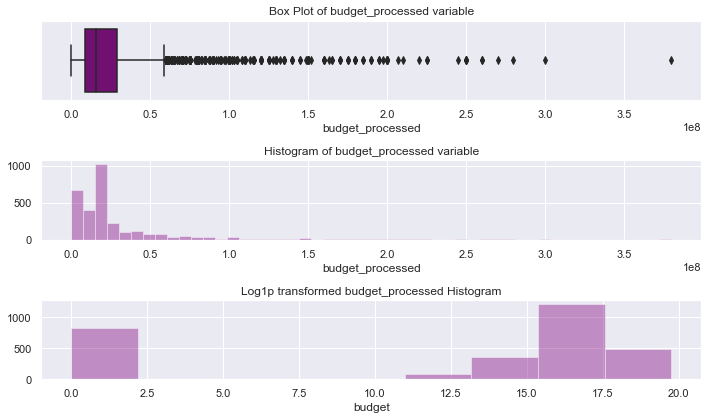

In [20]:
#plotting the data
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train.budget_processed, ax = ax[0], color='purple')
ax[0].set_title("Box Plot of budget_processed variable")
sns.distplot(a=train.budget_processed, kde = False, ax = ax[1], color='purple')
ax[1].set_title("Histogram of budget_processed variable")
sns.distplot(a=np.log1p(train.budget), kde = False, ax = ax[2], color='purple')
ax[2].set_title("Log1p transformed budget_processed Histogram")
f.tight_layout()


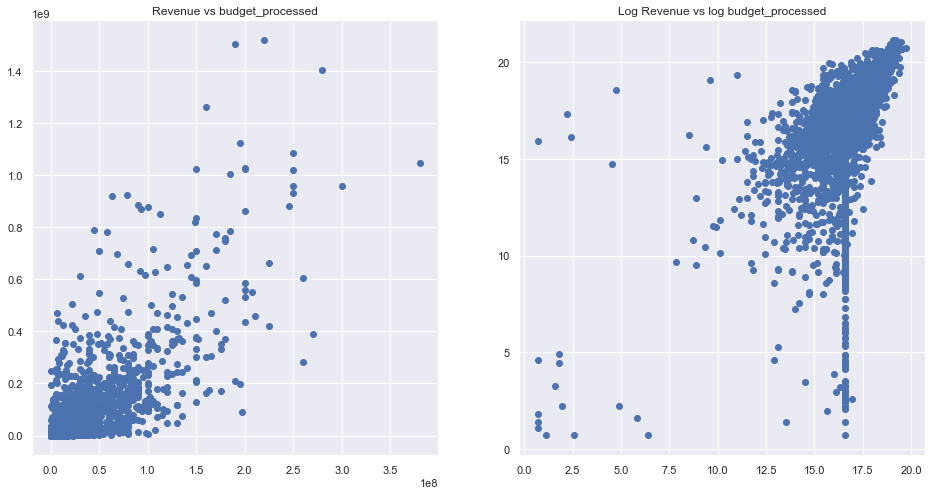

In [21]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(train['budget_processed'], train['revenue'])
plt.title('Revenue vs budget_processed');
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(train['budget_processed']), np.log1p(train['revenue']))
plt.title('Log Revenue vs log budget_processed');

In [22]:
#analysis of correlation and create log feature probably
corr, _ = pearsonr(train['budget_processed'], train['revenue'])
print('Pearsons correlation between budget_processed and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['budget_processed']), np.log1p(train['revenue']))
print('Pearsons correlation between log budget_processed and log revenue: %.3f' % corr)

Pearsons correlation between budget_processed and revenue: 0.747
Pearsons correlation between log budget_processed and log revenue: 0.455


## Homepage Variable Analysis

In [23]:
#homepage
print('Movies missing a homepage:',train.homepage.isna().sum())

Movies missing a homepage: 2054


Since the homepage itself is very unique and specific to each particular film, it not of much use to us and we will not be analyzing the content of the homepage for this project. Instead, we will create a new feature representing whether a move has a homepage or not.

In [24]:
#Creating new feature
train['has_homepage'] = train.homepage.apply(lambda x: 0 if pd.isnull(x) else 1)
train['has_homepage'].value_counts()

0    2054
1     946
Name: has_homepage, dtype: int64

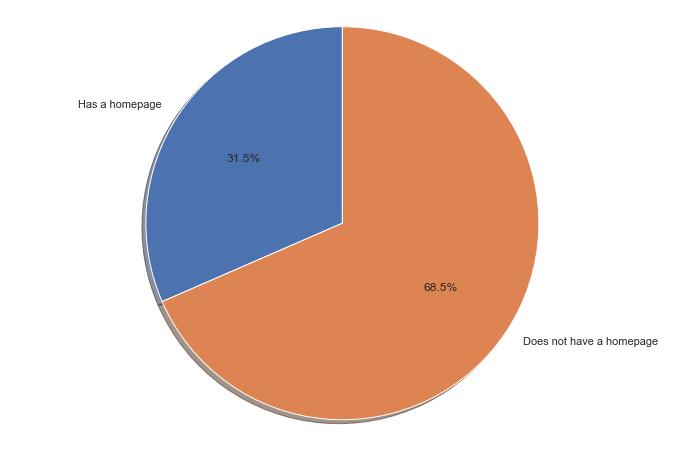

In [25]:
# plotting 'has a homepage' data
labels = 'Has a homepage', 'Does not have a homepage'
btc_1 = [sum(train.has_homepage), (train.has_homepage == 0).sum(axis=0)]


fig, ax = plt.subplots()
ax.pie(btc_1, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal') # ensures chart is a circle

plt.show()


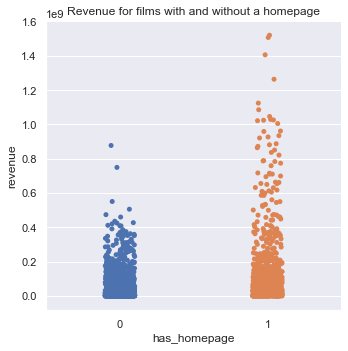

In [26]:
sns.catplot(x='has_homepage', y='revenue', data=train);
plt.title('Revenue for films with and without a homepage');

In [27]:
#analysis of correlation and create log feature probably
corr, _ = pearsonr(train['has_homepage'], train['revenue'])
print('Pearsons correlation between has_homepage and revenue: %.3f' % corr)

Pearsons correlation between has_homepage and revenue: 0.263


Although it is not very strong, we do still observe a positive correlation between the existence of a homepage for a film and the revenue

## Original Language Variable Analysis

In [28]:
#original_language
print("Counts of each original language:")
print(train['original_language'].value_counts()[:10])

Counts of each original language:
en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
cn      20
ko      20
zh      19
Name: original_language, dtype: int64


Text(0.5, 1, 'Revenue for a movie and its and original_language')

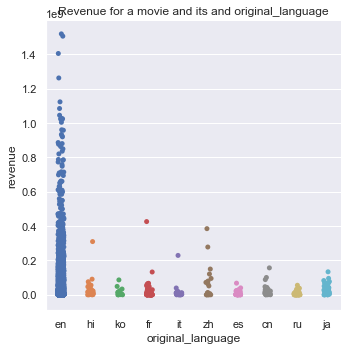

In [29]:
sns.catplot(x='original_language', y='revenue', data=train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)])
plt.title('Revenue for a movie and its and original_language')

Since 2575 of the 3000 movies in the training were originally released in English, and all other languages making up only a small portion of the movies, we will create a new dummy variable, simply specifying if the movie was released in english or not. It seems that it is not important what the specific other language is, but rather just that the movie is not english is most significant for our model. Additionally, the films that are in english reach mich higher revenues, so this may be a good feature to include.

In [30]:
#Creating new feature
train['in_english'] = train.original_language.apply(lambda x: 1 if x == 'en' else 0)
train['in_english'].value_counts()

1    2575
0     425
Name: in_english, dtype: int64

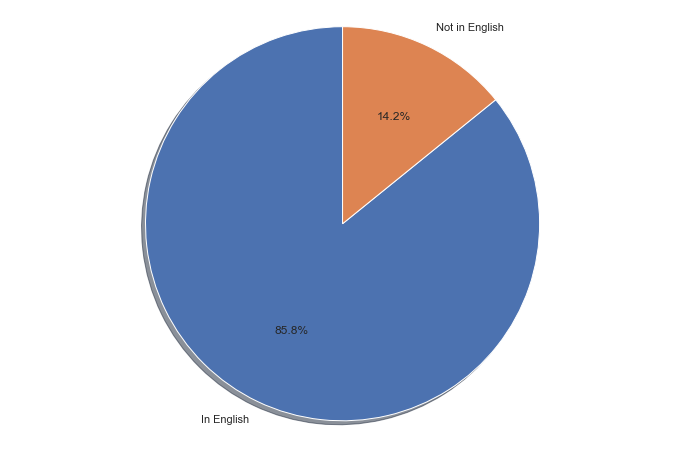

In [31]:
# plotting original data
labels = 'In English', 'Not in English'
btc_1 = [sum(train.in_english), (train.in_english == 0).sum(axis=0)]


fig, ax = plt.subplots()
ax.pie(btc_1, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal') # ensures chart is a circle

plt.show()


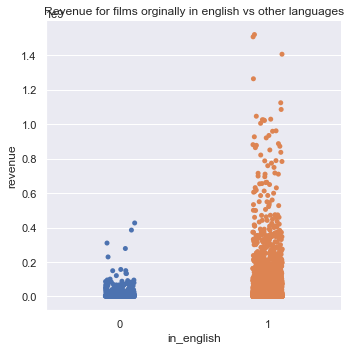

In [32]:
sns.catplot(x='in_english', y='revenue', data=train);
plt.title('Revenue for films orginally in english vs other languages');

In [33]:
#analysis of correlation and create log feature probably
corr, _ = pearsonr(train['in_english'], train['revenue'])
print('Pearsons correlation between in_english and revenue: %.3f' % corr)

Pearsons correlation between in_english and revenue: 0.142


We can see there is a weak positive correlation between the films being in english and the revenue of the film. While the films in english reach miuch greater revenues overall, this may just be simply because there are a far greater number of films released in english.


## Overview Variable Analysis

In [34]:
#overview
print('Movies missing an overview:',train.overview.isna().sum())

Movies missing an overview: 8


We will first fill the films that are missing overviews with an empty string, then for the sake of our model we will ust be looking at the length of the overview. The content in the overview could be something that is interesting to analyze, but we will not be looking at it for the scope of this project.

In [35]:
#pre-processing
train.overview = train.overview.fillna("")
train['overview_len'] = train.overview.apply(len)

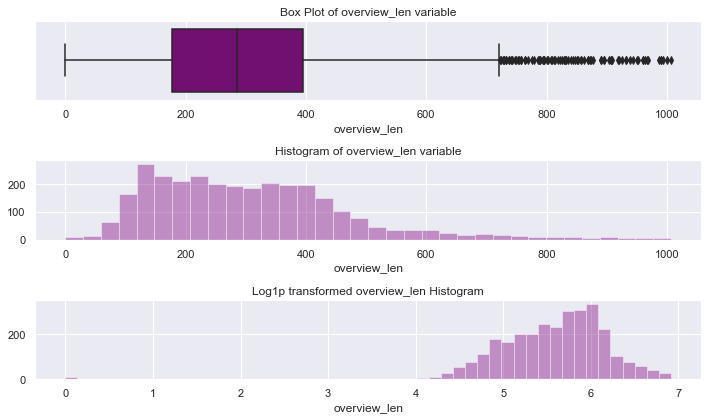

In [36]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train.overview_len, ax = ax[0], color='purple')
ax[0].set_title("Box Plot of overview_len variable")
sns.distplot(a=train.overview_len, kde = False, ax = ax[1], color='purple')
ax[1].set_title("Histogram of overview_len variable")
sns.distplot(a=np.log1p(train.overview_len), kde = False, ax = ax[2], color='purple')
ax[2].set_title("Log1p transformed overview_len Histogram")
f.tight_layout()

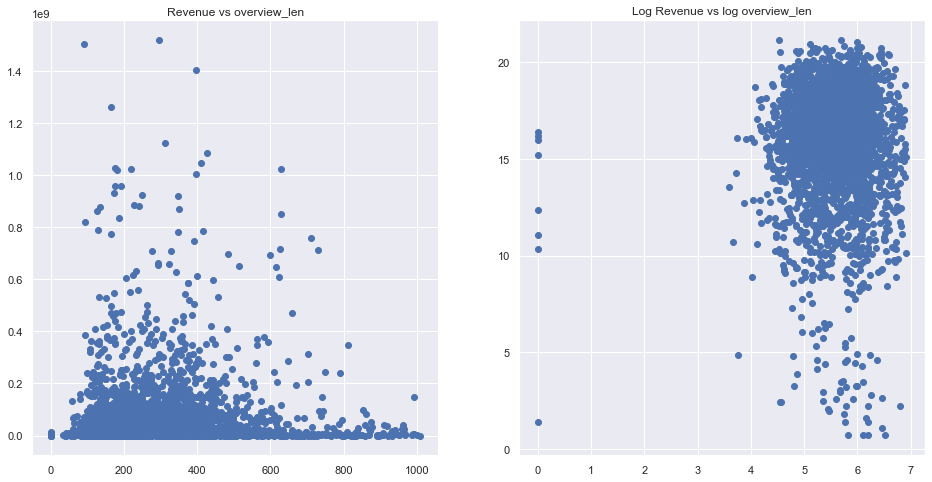

In [37]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(train['overview_len'], train['revenue'])
plt.title('Revenue vs overview_len');
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(train['overview_len']), np.log1p(train['revenue']))
plt.title('Log Revenue vs log overview_len');

In [38]:
# calculate Pearson's correlation
corr, _ = pearsonr(train['overview_len'], train['revenue'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.005


There is virtually no correlation existing between the length of the overview for a film and the revenue, meaning this will not be a useful feature for out model. We will almost certainly be dropping this column.

## Poster Path Variable Analysis

In [39]:
#poster_path
print('Movies missing a poster path:',train.poster_path.isna().sum())

train['has_poster_path'] = train.poster_path.apply(lambda x: 0 if pd.isnull(x) else 1)

#recoded variable to be a dummy variable, not sure if plot is needed (maybe pie chart) or what analysis to do

train['has_poster_path'].value_counts()

Movies missing a poster path: 1


1    2999
0       1
Name: has_poster_path, dtype: int64

Only 1 movie in the training set is missing a poster path, therefore it is likely not very useful for our model. Since we will not be analyzing the content found at the poster path, this variable is not of use to us and we will drop it.

## Production Countries Variable Analysis

In [40]:
print('Movies missing production countries:',train.poster_path.isna().sum())

Movies missing production countries: 1


In [41]:
#pre-processing
train.production_countries = train.production_countries.fillna("")
train['production_countries_processed'] = train['production_countries'].apply(lambda x: re.findall("'name': \'(.+?)\'", x))

train['num_production_countries'] = train['production_countries_processed'].apply(lambda x: len(x))



Text(0.5, 1.0, 'Revenue based on number of production countries')

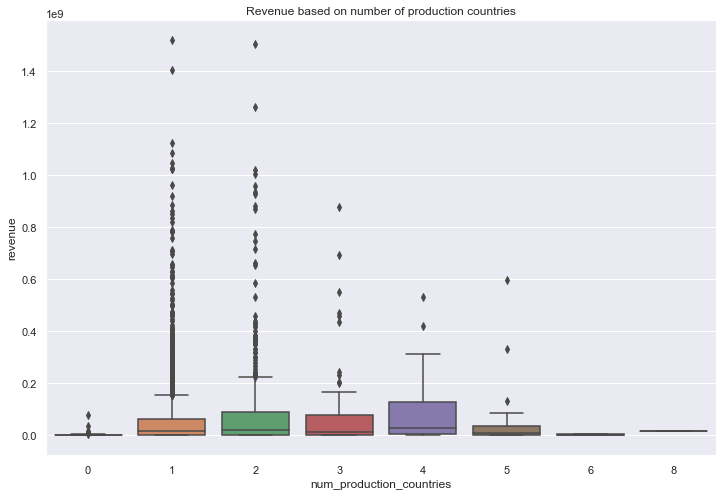

In [42]:
sns.boxplot(x='num_production_countries', y='revenue', data=train)
plt.title('Revenue based on number of production countries')

In [43]:
# calculate Pearson's correlation
corr, _ = pearsonr(train['num_production_countries'], train['revenue'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.053


We can see there is no correlation between the number of production countries on a film and the revenue, so this will not be useful to us. Instead, we should take a deeper look at this variable and create a new feature to see the most popular production countires where films are made.

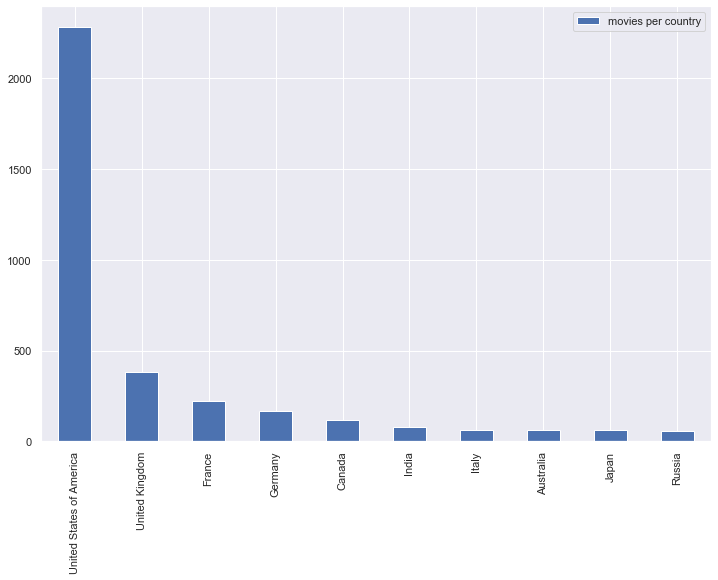

In [45]:
countriesDict = {}
for element in train["production_countries_processed"].values:
    for country in element:
        if country not in countriesDict:
            countriesDict[country] = 1
        else:
            countriesDict[country] += 1

countries_df = pd.DataFrame.from_dict(countriesDict, orient='index', columns=["movies per country"])
countries_df.sort_values(by="movies per country", ascending=False).head(10).plot.bar()

We can see from the plot that the overwhelming majority of films have the United States listed as a production country, with the second highest (United Kingdom) being incredibly far behind. Because of this observation, we will not look at all of the different production countries, but instead create a feature to determine whether or not a film was produced in the United States

In [46]:
#Creating new feature
train['usa_produced'] = train.production_countries_processed.apply(lambda x: 1 if 'United States of America' in x else 0)
train['usa_produced'].value_counts()

1    2282
0     718
Name: usa_produced, dtype: int64

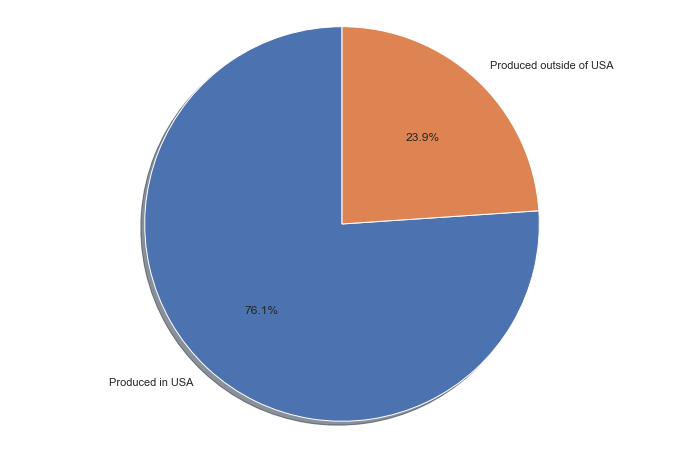

In [47]:
# plotting has a homepage data
labels = 'Produced in USA', 'Produced outside of USA'
btc_1 = [sum(train.usa_produced), (train.usa_produced == 0).sum(axis=0)]


fig, ax = plt.subplots()
ax.pie(btc_1, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal') # ensures chart is a circle

plt.show()                                        

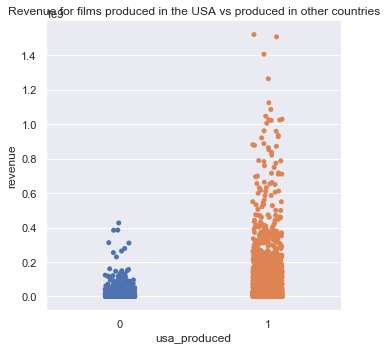

In [48]:
sns.catplot(x='usa_produced', y='revenue', data=train);
plt.title('Revenue for films produced in the USA vs produced in other countries');

In [49]:
# calculate Pearson's correlation
corr, _ = pearsonr(train['usa_produced'], train['revenue'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.198


We observe a small positive correlation between our created feature and the revenue. While the correlation is not incredibly strong, it may be useful to include in our model.

## Runtime Variable Analysis

In [50]:
#runtime
print('Movies missing a runtime:',train.runtime.isna().sum())

Movies missing a runtime: 2


In [51]:
#pre-processing
train.runtime = train.runtime.fillna(train.runtime.median())

#possibly fill 0s as well

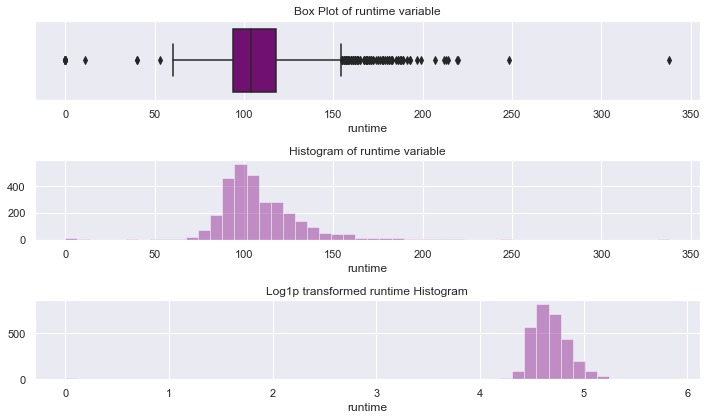

In [52]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train.runtime, ax = ax[0], color='purple')
ax[0].set_title("Box Plot of runtime variable")
sns.distplot(a=train.runtime, kde = False, ax = ax[1], color='purple')
ax[1].set_title("Histogram of runtime variable")
sns.distplot(a=np.log1p(train.runtime), kde = False, ax = ax[2], color='purple')
ax[2].set_title("Log1p transformed runtime Histogram")
f.tight_layout()

In [53]:
train.loc[train['runtime'].argmax()]

id                                                                             1212
belongs_to_collection                                                           NaN
budget                                                                     18000000
genres                            [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...
homepage                                                                        NaN
imdb_id                                                                   tt1321865
original_language                                                                en
original_title                                                               Carlos
overview                          The story of Venezuelan revolutionary, Ilich R...
popularity                                                                  4.55807
poster_path                                        /obHJeOHn8J5XD049nj7KVSpAMEW.jpg
production_companies              [{'name': 'Egoli Tossell Film AG', 'id': 2

In [54]:
# justify decision on outlier

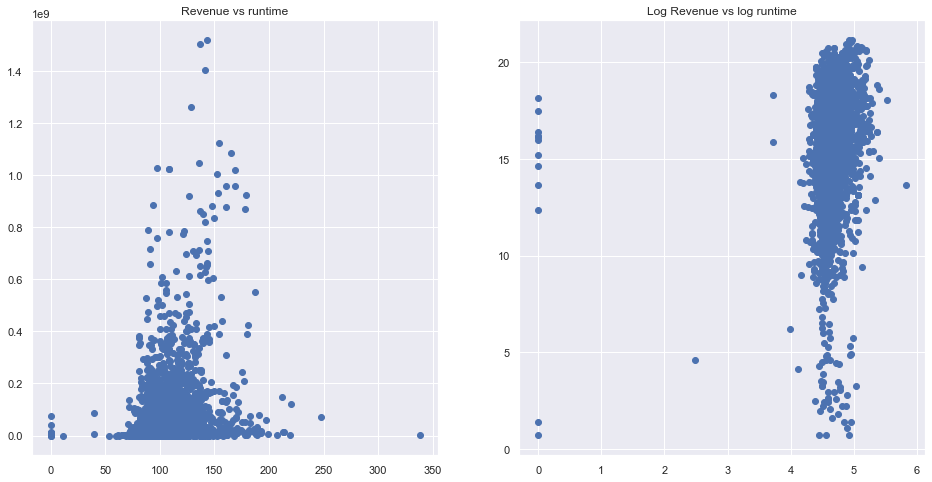

In [55]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(train['runtime'], train['revenue'])
plt.title('Revenue vs runtime');
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(train['runtime']), np.log1p(train['revenue']))
plt.title('Log Revenue vs log runtime');

In [56]:
# calculate Pearson's correlation
corr, _ = pearsonr(train['runtime'], train['revenue'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.216


In [57]:
print('Movies with runtime listed as 0: ',(train.runtime == 0).sum())

Movies with runtime listed as 0:  12


There are 12 movies with the runtime listed as 0 in the dataset, which is also a clear error as no movie will have a true runtime of 0. We will replace these values the the median of the non-zero runtimes.

In [58]:
median = train.loc[train['runtime'] > 0, 'runtime'].median()
train["runtime_processed"] = train["runtime"].mask(train["runtime"] == 0, median)

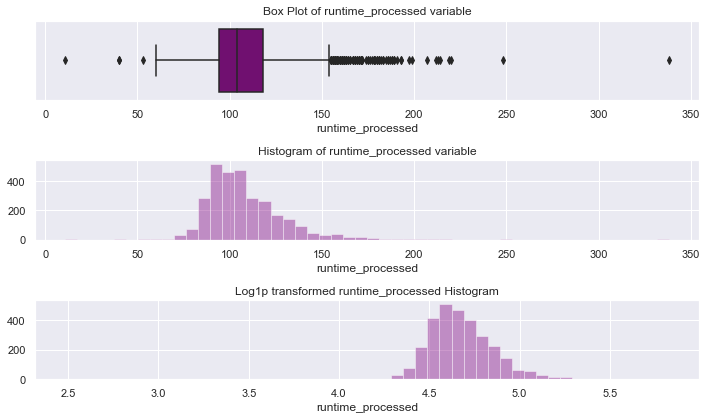

In [59]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train.runtime_processed, ax = ax[0], color='purple')
ax[0].set_title("Box Plot of runtime_processed variable")
sns.distplot(a=train.runtime_processed, kde = False, ax = ax[1], color='purple')
ax[1].set_title("Histogram of runtime_processed variable")
sns.distplot(a=np.log1p(train.runtime_processed), kde = False, ax = ax[2], color='purple')
ax[2].set_title("Log1p transformed runtime_processed Histogram")
f.tight_layout()

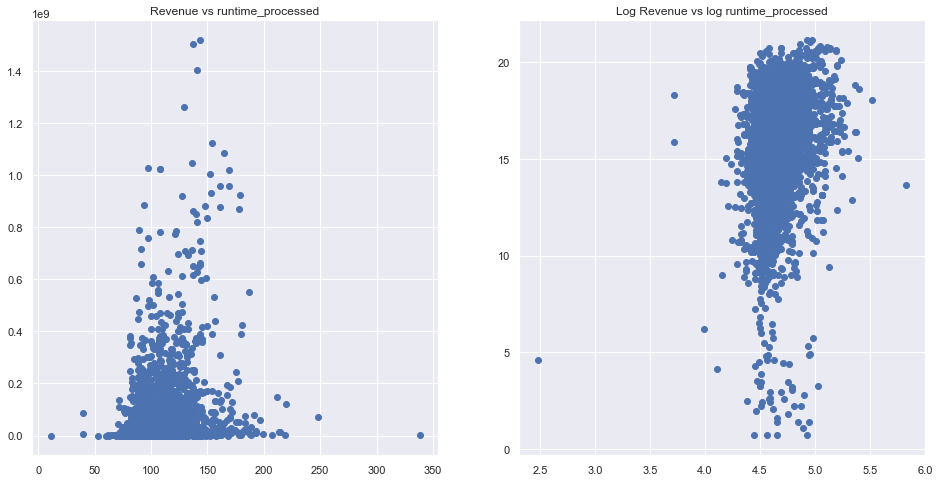

In [60]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(train['runtime_processed'], train['revenue'])
plt.title('Revenue vs runtime_processed');
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(train['runtime_processed']), np.log1p(train['revenue']))
plt.title('Log Revenue vs log runtime_processed');

In [61]:
# calculate Pearson's correlation
corr, _ = pearsonr(train['runtime_processed'], train['revenue'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.220


## Status Variable Analysis

In [62]:
#status
print(train.status.value_counts())

Released    2996
Rumored        4
Name: status, dtype: int64


All but 4 of the movies in the training set are released, so this variable is not very useful. Additionally, the goal of our model is to accurately predict box office success (revenue) regardless of if the movie is released or not. The model has use in predicting movies that have not released yet and will be trained on already released movies, therefore the release status is not useful and we will drop this column.

## Title Variable Analysis

In [63]:
print('Movies missing a title:',train.title.isna().sum())

Movies missing a title: 0


In [64]:
train['title_len'] = train.title.apply(len)

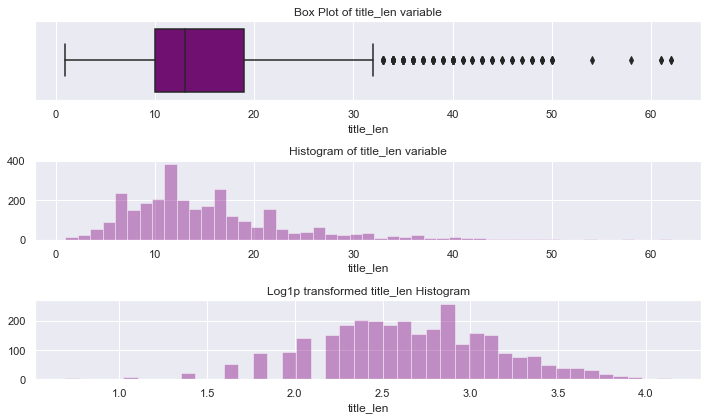

In [65]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train.title_len, ax = ax[0], color='purple')
ax[0].set_title("Box Plot of title_len variable")
sns.distplot(a=train.title_len, kde = False, ax = ax[1], color='purple')
ax[1].set_title("Histogram of title_len variable")
sns.distplot(a=np.log1p(train.title_len), kde = False, ax = ax[2], color='purple')
ax[2].set_title("Log1p transformed title_len Histogram")
f.tight_layout()

For the scope of this project, we do not look at the contents of the titles, so instead we create a new feature based on the length of the title. The plots above are the distributions of title lengths and then the log transformed distribution

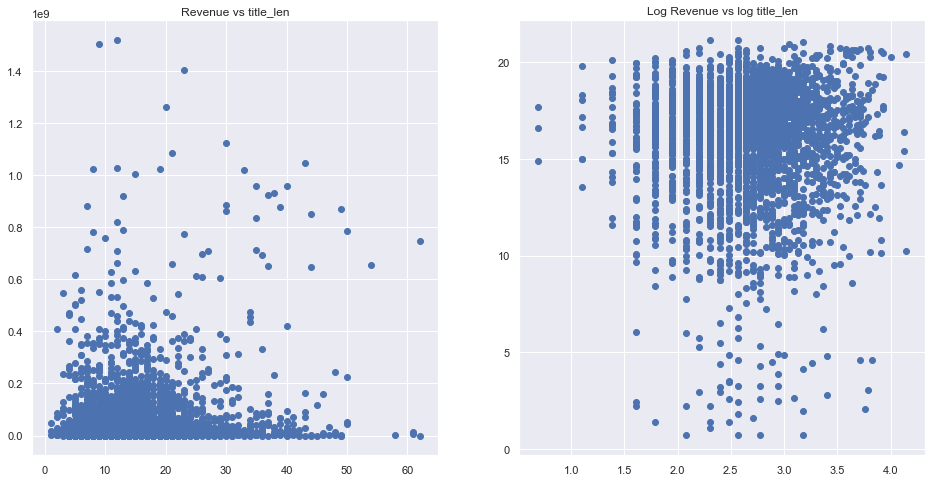

In [66]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(train['title_len'], train['revenue'])
plt.title('Revenue vs title_len');
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(train['title_len']), np.log1p(train['revenue']))
plt.title('Log Revenue vs log title_len');

In [67]:
# calculate Pearson's correlation
corr, _ = pearsonr(train['title_len'], train['revenue'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.110


There is a very small positive correlation between the length of the title of a film and revenue. It is a weak correlation, so we will likely drop this from our model since it doe not seem to be very useful

## Cast Variable Analysis

In [68]:
print('Movies missing a cast:',train.cast.isna().sum())

Movies missing a cast: 13


In [69]:
#pre-processing
train.cast = train.cast.fillna("")
train['cast_processed'] = train['cast'].apply(lambda x: re.findall("'name': \'(.+?)\'", x))

In [70]:
# explain preprocessing and how we will be using the cast variable


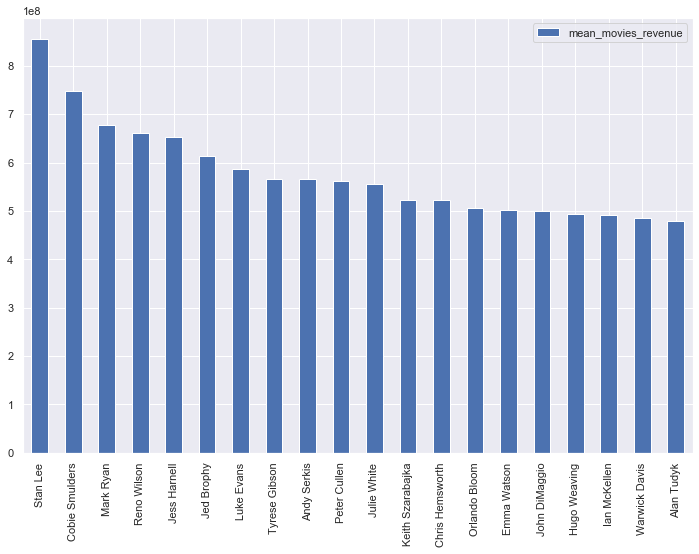

In [71]:
actorsDict = {}
for element in train[["revenue", "cast_processed"]].values:
    
    for actor in element[1]:
        if actor not in actorsDict:
            actorsDict[actor] = [element[0], 1]
        else:
            actorsDict[actor][0] += element[0]
            actorsDict[actor][1] += 1    

actorsDict = {k: v for k, v in actorsDict.items() if v[1] >= 5}

for actor in actorsDict:
    actorsDict[actor][0] = actorsDict[actor][0]/actorsDict[actor][1]
    actorsDict[actor] = actorsDict[actor][0]


    
    
actors_df = pd.DataFrame.from_dict(actorsDict, orient='index', columns=["mean_movies_revenue"])
actors_df.sort_values(by="mean_movies_revenue", ascending=False).head(20).plot.bar()

This is a plot of the top 20 actors based on average box office revenue. This list is not very reliable, as it factors in anyone in the cast, meaning cameos are factored in. As shown by the plot, Stan Lee is at the top of the list, however he never holds a significant role in movies, but tends to have cameos in very successful movies, putting him above much more notable actors/actresses.

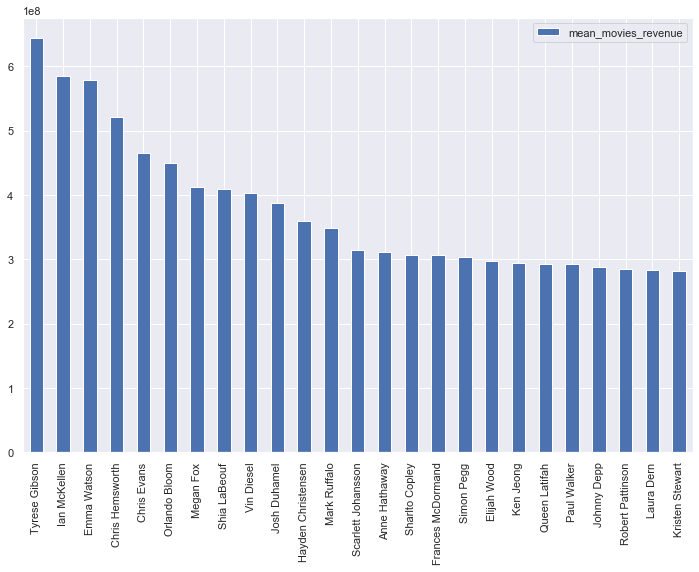

In [72]:
#cast

actorsDict = {}
for element in train[["revenue", "cast_processed"]].values:
   # compare results when looking at x top actors in films vs whole cast 
    temp = 5
    if len(element[1]) < temp:
        temp = len(element[1])
    for i in range(temp):
        if element[1][i] not in actorsDict:
            actorsDict[element[1][i]] = [element[0], 1]
        else:
            actorsDict[element[1][i]][0] += element[0]
            actorsDict[element[1][i]][1] += 1    

actorsDict = {k: v for k, v in actorsDict.items() if v[1] >= 5}

for actor in actorsDict:
    actorsDict[actor][0] = actorsDict[actor][0]/actorsDict[actor][1]
    actorsDict[actor] = actorsDict[actor][0]


    
    
actors_df = pd.DataFrame.from_dict(actorsDict, orient='index', columns=["mean_movies_revenue"])
actors_df.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar()

In [73]:
#analysis


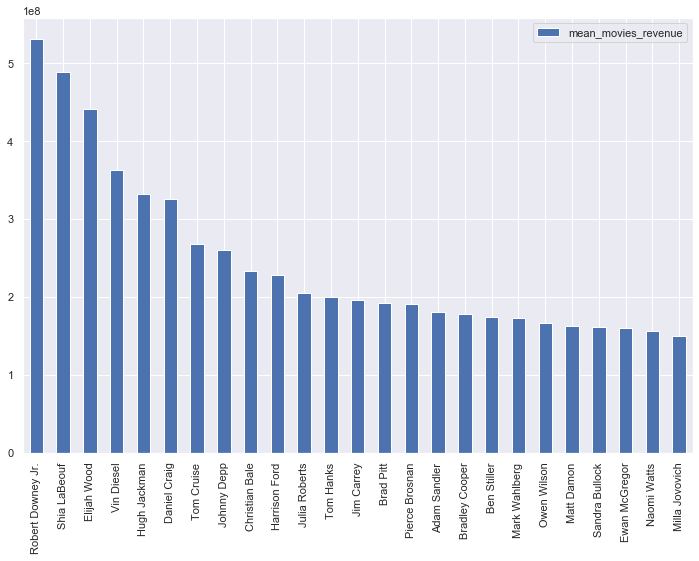

In [74]:
leadActorsDict = {}
for element in train[["revenue", "cast_processed"]].values:
   # compare results when looking at x top actors in films vs whole cast 
    temp = 1
    if len(element[1]) < temp:
        temp = len(element[1])
    for i in range(temp):
        if element[1][i] not in leadActorsDict:
            leadActorsDict[element[1][i]] = [element[0], 1]
        else:
            leadActorsDict[element[1][i]][0] += element[0]
            leadActorsDict[element[1][i]][1] += 1    

leadActorsDict = {k: v for k, v in leadActorsDict.items() if v[1] >= 5}

for actor in leadActorsDict:
    leadActorsDict[actor][0] = leadActorsDict[actor][0]/leadActorsDict[actor][1]
    leadActorsDict[actor] = leadActorsDict[actor][0]


    
    
actors_df = pd.DataFrame.from_dict(leadActorsDict, orient='index', columns=["mean_movies_revenue"])
actors_df.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar()


This is a plot of the top 50 actors as a LEAD actor, meaning the first one credited for a film. This could be a useful feature as these actors have proven success as a lead role.

Because of how drastically different the results are depending on if you only look at the lead actor, compared to several of the lead actors, we will create a feature for each. 

The first feature will be a dummy variable representing simply whether or not the lead actor of the movie is a 'top lead actor'. The second feature will be a count of how many 'top actors' the movie has in it's cast, limiting to only the top 5 actors of the cast to only factor in significant roles and not cameos. 

We decided to classify a 'top actor' as an actor in the top 50 for the lead actor, and top 100 for all actors, ranked based on average box office revenue of past movies.

In [75]:
# Sort both of our dicts of actors and lead actors to more easily access the 'top actors'
leadActorsDict = {k: v for k, v in sorted(leadActorsDict.items(), key=lambda item: item[1], reverse = True)}
actorsDict = {k: v for k, v in sorted(actorsDict.items(), key=lambda item: item[1], reverse = True)}


# function to check if lead role is a 'top actor'
def checkLeadActor(cast):
    if len(cast) < 1 or cast[0] not in list(leadActorsDict)[:25]:
        return 0
    else:
        return 1

def checkTopActors(cast):
    if len(cast) < 1:
        return 0
    count = 0
    for actor in cast[:5]:
        if actor in list(actorsDict)[:100]:
            count += 1
    return count

#Creating a feature for top LEAD actors
train['topLeadActor'] = train['cast_processed'].apply(lambda x: checkLeadActor(x))
#Creating feature for number of top actors
train['numTopActors'] = train['cast_processed'].apply(lambda x: checkTopActors(x))


print(train['topLeadActor'].value_counts())
print()
print(train['numTopActors'].value_counts())

0    2788
1     212
Name: topLeadActor, dtype: int64

0    2345
1     491
2     120
3      29
4       8
5       7
Name: numTopActors, dtype: int64


These results are questionable and our methods need further inspection. It seems a bit odd that the overwhelming majority of movies don't have a single 'top actor', but there are plenty of actors so maybe this is accurate. There is a lot of fluctuation in the results based on changing any single one of the variables, so this should be analyzed more closely before moving on.

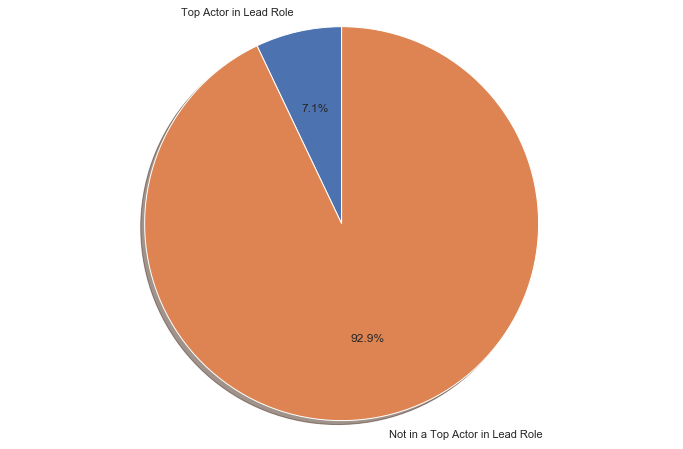

In [76]:
# plotting original data
labels = 'Top Actor in Lead Role', 'Not in a Top Actor in Lead Role'
btc_1 = [sum(train.topLeadActor), (train.topLeadActor == 0).sum(axis=0)]


fig, ax = plt.subplots()

plt.pie(btc_1, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal') # ensures chart is a circle



plt.show()

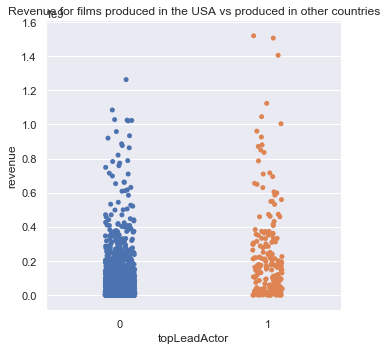

In [77]:
sns.catplot(x='topLeadActor', y='revenue', data=train);
plt.title('Revenue for films produced in the USA vs produced in other countries');

In [78]:
# calculate Pearson's correlation
corr, _ = pearsonr(train['topLeadActor'], train['revenue'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.326


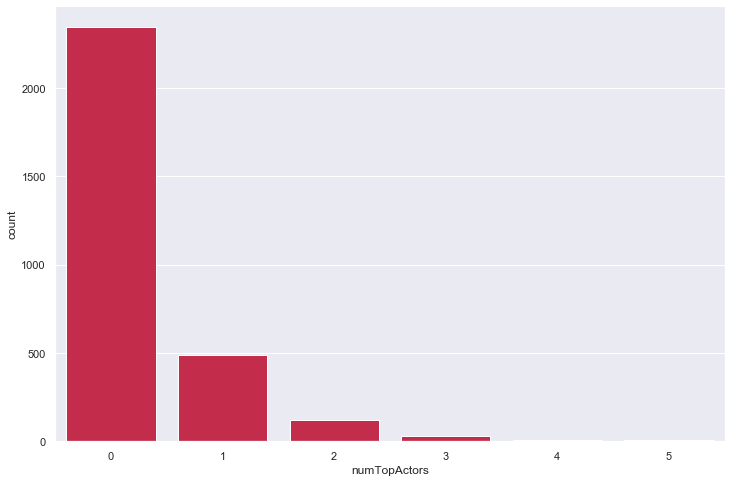

In [79]:
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(x=train.numTopActors, color='crimson')

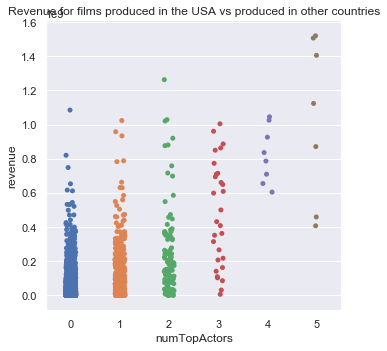

In [80]:
sns.catplot(x='numTopActors', y='revenue', data=train);
plt.title('Revenue for films produced in the USA vs produced in other countries');

In [81]:
# calculate Pearson's correlation
corr, _ = pearsonr(train['numTopActors'], train['revenue'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.558


885

## Revenue Variable Analysis

In [88]:
print('Movies missing revenue:',train.revenue.isna().sum())


Movies missing revenue: 0


In [92]:
train.revenue.describe()

count    3.000000e+03
mean     6.672585e+07
std      1.375323e+08
min      1.000000e+00
25%      2.379808e+06
50%      1.680707e+07
75%      6.891920e+07
max      1.519558e+09
Name: revenue, dtype: float64

Movies missing revenue: 0


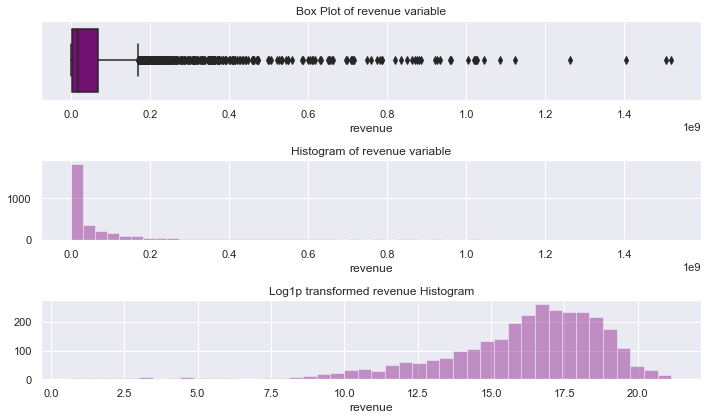

In [83]:


f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train.revenue, ax = ax[0], color='purple')
ax[0].set_title("Box Plot of revenue variable")
sns.distplot(a=train.revenue, kde = False, ax = ax[1], color='purple')
ax[1].set_title("Histogram of revenue variable")
sns.distplot(a=np.log1p(train.revenue), kde = False, ax = ax[2], color='purple')
ax[2].set_title("Log1p transformed revenue Histogram")
f.tight_layout()

## Correlation Matrix

Now that was have taken a look at all of the variables, let's have a look at the entire correlation matrix.

Text(0.5, 1, 'Correlation between numerical features')

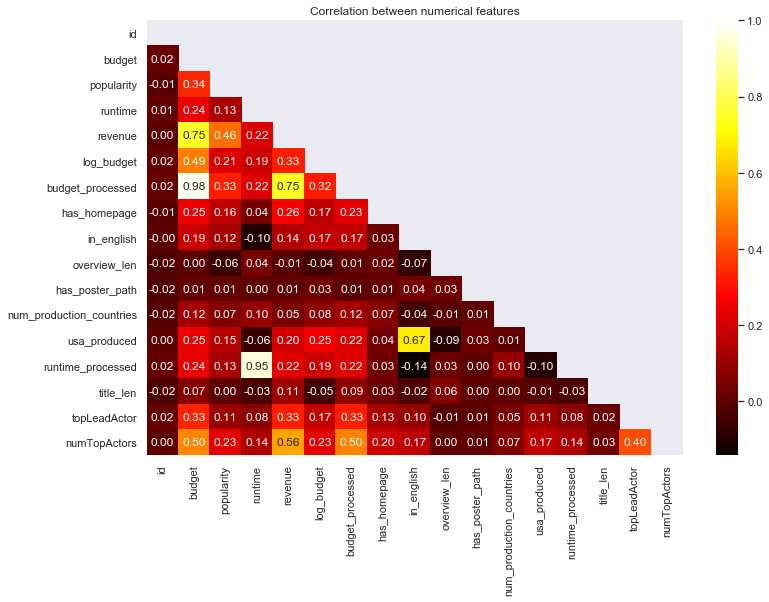

In [84]:
# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, 
            annot=True, 
            fmt=".2f", 
            cmap='hot')

plt.title("Correlation between numerical features")